In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ----------------------------------------- READ CONFIG FILE -----------------------------------------

In [425]:
config_file = 'Test/config.dat'

# Read the config file
with open(config_file, 'r') as f:
    lines = f.readlines()

# Extract relevant parameters from the config file
for line in lines:
    try:
        if line.startswith('CONSTRAINT'):
            constraint = line.split('=', 1)[1].split('#')[0].strip()
            constraint = str(constraint)
    except Exception as e:
        print(f"Error parsing CONSTRAINT: {e}")

    try:
        if line.startswith('OMEGA'):
            omega = line.split('=', 1)[1].split('#')[0].strip()
            omega = float(omega)
    except Exception as e:
        print(f"Error parsing OMEGA: {e}")
    
    try:
        if line.startswith('LAMBDA'):
            lambdac = line.split('=', 1)[1].split('#')[0].strip()
            lambdac = float(lambdac)
    except Exception as e:
        print(f"Error parsing LAMBDA: {e}")
    
    try:
        if line.startswith('WEOS'):
            weos = line.split('=', 1)[1].split('#')[0].strip()
            weos = float(weos)
    except Exception as e:
        print(f"Error parsing WEOS: {e}")

    try:
        if line.startswith('HUBBLE CONSTANT'):
            h0 = line.split('=', 1)[1].split('#')[0].strip()
            h0 = float(h0)
    except Exception as e:
        print(f"Error parsing HUBBLE CONSTANT: {e}")
    
    try:
        if line.startswith('X_LOW'):
            x_low = line.split('=', 1)[1].split('#')[0].strip()
            x_low = float(x_low)
    except Exception as e:
        print(f"Error parsing X_LOW: {e}")
    
    try:
        if line.startswith('X_UP'):
            x_up = line.split('=', 1)[1].split('#')[0].strip()
            x_up = float(x_up)
    except Exception as e:
        print(f"Error parsing X_UP: {e}")

    try:
        if line.startswith('Y_LOW'):
            y_low = line.split('=', 1)[1].split('#')[0].strip()
            y_low = float(y_low)
    except Exception as e:
        print(f"Error parsing Y_LOW: {e}")
    
    try:
        if line.startswith('Y_UP'):
            y_up = line.split('=', 1)[1].split('#')[0].strip()
            y_up = float(y_up)
    except Exception as e:
        print(f"Error parsing Y_UP: {e}")

    try:
        if line.startswith('EXTEN_PIX'):
            exten_pix = line.split('=', 1)[1].split('#')[0].strip()
            exten_pix = float(exten_pix)
    except Exception as e:
        print(f"Error parsing EXTEN_PIX: {e}")
    
    try:
        if line.startswith('POINT_PIX'):
            point_pix = line.split('=', 1)[1].split('#')[0].strip()
            point_pix = float(point_pix)
    except Exception as e:
        print(f"Error parsing POINT_PIX: {e}")

    try:
        if line.startswith('MAXLEV'):
            maxlev = line.split('=', 1)[1].split('#')[0].strip()
            maxlev = str(maxlev)
    except Exception as e:
        print(f"Error parsing MAXLEV: {e}")

    try:
        if line.startswith('CHI2_PLANE'):
            chi2_plane = line.split('=', 1)[1].split('#')[0].strip()
            chi2_plane = str(chi2_plane)
    except Exception as e:
        print(f"Error parsing CHI2_PLANE: {e}")
    
    try:
        if line.startswith('USEMAG'):
            usemag = line.split('=', 1)[1].split('#')[0].strip()
            usemag = int(usemag)
    except Exception as e:
        print(f"Error parsing USEMAG: {e}")
    
    try:
        if line.startswith('READOBS'):
            readobs = line.split('=', 1)[1].split('#')[0].strip()
            readobs = str(readobs)
    except Exception as e:
        print(f"Error parsing READOBS: {e}")
    
    try:
        if line.startswith('OPTIMIZE'):
            optimize = line.split('=', 1)[1].split('#')[0].strip()
            optimize = int(optimize)
    except Exception as e:
        print(f"Error parsing OPTIMIZE: {e}")
    
    try:
        if line.startswith('FINDIMG'):
            findimg = line.split('=', 1)[1].split('#')[0].strip()
            findimg = int(findimg)
    except Exception as e:
        print(f"Error parsing FINDIMG: {e}")
    
    try:
        if line.startswith('WRITECRIT'):
            writecrit = line.split('=', 1)[1].split('#')[0].strip()
            writecrit = int(writecrit)
    except Exception as e:
        print(f"Error parsing WRITECRIT: {e}")
    
    try:
        if line.startswith('WRITELENS'):
            writelens = line.split('=', 1)[1].split('#')[0].strip()
            writelens = int(writelens)
    except Exception as e:
        print(f"Error parsing WRITELENS: {e}")

    try:
        if line.startswith('MODEL'):
            basemodel = line.split('=', 1)[1].split('#')[0].strip()
            basemodel = str(basemodel)
    except Exception as e:
        print(f"Error parsing MODEL: {e}")

    try:
        if line.startswith('PATH'):
            path = line.split('=', 1)[1].split('#')[0].strip()
            path = str(path)
    except Exception as e:
        print(f"Error parsing PATH: {e}")
    
    try:
        if line.startswith('INIT_PARAM'):
            init_param = line.split('=', 1)[1].split('#')[0].strip()
            init_param = str(init_param)
    except Exception as e:
        print(f"Error parsing INIT_PARAM: {e}")
    
    try:
        if line.startswith('ZL'):
            zl = line.split('=', 1)[1].split('#')[0].strip()
            zl = float(zl)
    except Exception as e:
        print(f"Error parsing ZL: {e}")

print(f"Using constraint: {constraint}")
print(f"Using omega: {omega}")
print(f"Using lambda: {lambdac}")
print(f"Using weos: {weos}")
print(f"Using Hubble constant: {h0}")
print(f"Using x_low: {x_low}")
print(f"Using x_up: {x_up}")
print(f"Using y_low: {y_low}")
print(f"Using y_up: {y_up}")
print(f"Using exten_pix: {exten_pix}")
print(f"Using point_pix: {point_pix}")
print(f"Using maxlev: {maxlev}")
print(f"Using chi2_plane: {chi2_plane}")
print(f"Using usemag: {usemag}")
print(f"Using readobs: {readobs}")
print(f"Using optimize: {optimize}")
print(f"Using findimg: {findimg}")
print(f"Using writecrit: {writecrit}")
print(f"Using writelens: {writelens}")
print(f"Using model: {basemodel}")
print(f"Using path: {path}")
print(f"Using init_param: {init_param}")
print(f"Using zl: {zl}")
print("Config file read successfully.")

Using constraint: pos+flux
Using omega: 0.3
Using lambda: 0.7
Using weos: -1.0
Using Hubble constant: 0.7
Using x_low: -3.5
Using x_up: 3.5
Using y_low: -3.5
Using y_up: 3.5
Using exten_pix: 0.01
Using point_pix: 0.01
Using maxlev: 1
Using chi2_plane: 1
Using usemag: 0
Using readobs: 'Test/input.dat'
Using optimize: 1
Using findimg: 1
Using writecrit: 1
Using writelens: 1
Using model: POW+SHEAR
Using path: Test/
Using init_param: 'Random'
Using zl: 0.23
Config file read successfully.


### --------------------------------------------- OBS POINT ---------------------------------------------

In [426]:
# Obs Point File Reading
obs_columns = ['x', 'y', 'mag', 'pos_err', 'mag_err', 'td', 'td_err', 'parity']
first_row_columns = ['id', 'n_img', 'zs', 'zs_err']
obs_point = pd.read_csv('Test/obs_point+flux.dat', skiprows=1, header=None, names=obs_columns, delim_whitespace=True)
first_row = pd.read_csv('Test/obs_point+flux.dat', nrows=1, header=None, names=first_row_columns, delim_whitespace=True)

In [427]:
n_img = first_row['n_img'][0]
zs = first_row['zs'][0]
zs_err = first_row['zs_err'][0]

In [428]:
# Assigning Names to the Images
# Find brightest image
brightest_index = obs_point['mag'].idxmax()
obs_point.at[brightest_index, 'Img'] = 'A'

# Clockwise assignment of names from Img A 
def assign_image_names(df, start_index):
    names = ['A', 'B', 'C', 'D']
    current_name_index = 0
    current_index = start_index
    assigned_indices = {current_index}
    
    while len(assigned_indices) < len(df):
        current_x, current_y = df.at[current_index, 'x'], df.at[current_index, 'y']
        next_index = None
        max_angle = -float('inf')
        
        for i in range(len(df)):
            if i in assigned_indices:
                continue
            dx = df.at[i, 'x'] - current_x
            dy = df.at[i, 'y'] - current_y
            angle = np.arctan2(dy, dx)
            if angle > max_angle:
                max_angle = angle
                next_index = i
        
        if next_index is not None:
            current_name_index += 1
            df.at[next_index, 'Img'] = names[current_name_index]
            assigned_indices.add(next_index)
            current_index = next_index

assign_image_names(obs_point, brightest_index)


In [429]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,0.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,0.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,0.0,0.0,0,D


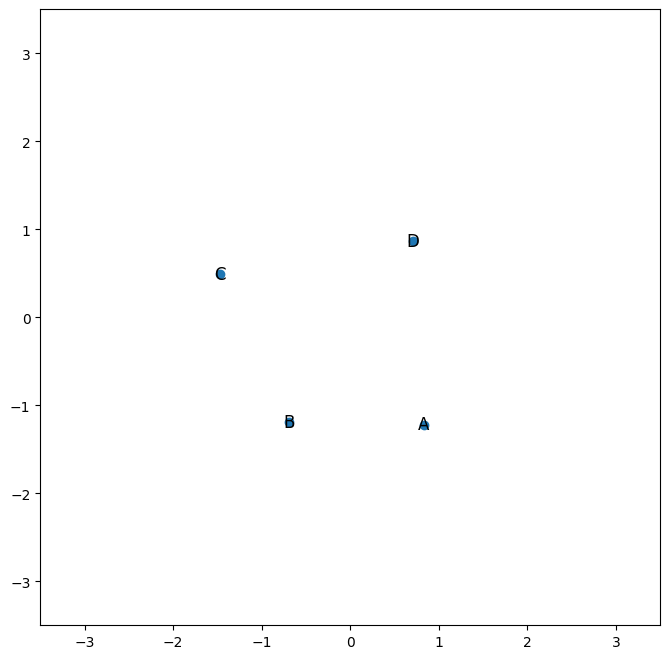

In [430]:
plt.figure(figsize=(8, 8))
plt.scatter(obs_point['x'], obs_point['y'])
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
for i, row in obs_point.iterrows():
    plt.text(row['x'], row['y'], row['Img'], fontsize=12, ha='center', va='center')

In [431]:
df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))
df

,x,y,mag,pos_err,mag_err,td,td_err,parity
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0


In [432]:
# Generate the obs_point.dat file
constraint = constraint

# Building the file
with open('Test/input.dat', 'w') as f:
    f.write(f"{first_row.at[0, 'id']} {first_row.at[0, 'n_img']} {first_row.at[0, 'zs']} {first_row.at[0, 'zs_err']}\n")

    df = pd.DataFrame(0, columns=obs_columns, index=range(int(first_row.at[0, 'n_img'])))

    if 'pos' in constraint:
        df['x'] = obs_point['x']
        df['y'] = obs_point['y']
        df['pos_err'] = obs_point['pos_err']
    
    if 'flux' in constraint:
        df['mag'] = obs_point['mag']
        df['mag_err'] = obs_point['mag_err']

    if 'td' in constraint:
        df['td'] = obs_point['td']
        df['td_err'] = obs_point['td_err']
    
    if 'parity' in constraint:
        df['parity'] = obs_point['parity']
    
    f.write(df.to_string(header=False, index=False))
    
    # Save the file 
    print("File 'Test/input.dat' generated successfully.")

File 'Test/input.dat' generated successfully.


### --------------------------------------- INITIAL GUESS GENERATION+READING ---------------------------------------

In [433]:
# Define the lens corresponding parameters (order preserved)
# POW
pow_params = ['$z_{s,fid}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{Ein}$', '$\gamma$ (PWI)']

# SIE
sie_params = ['$\sigma$', 'x', 'y', 'e', '$θ_{e}$', '$r_{core}$', 'NaN']

# NFW
nfw_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', 'NaN']

# EIN
ein_params = ['M', 'x', 'y', 'e', '$θ_{e}$', 'c or $r_{s}$', r'$\alpha_{e}$']

# SHEAR 
shear_params = ['$z_{s,fid}$', 'x', 'y', '$\gamma$', '$θ_{\gamma}$', 'NaN', '$\kappa$']

# Sersic
sersic_params = ['$M_{tot}$', 'x', 'y', 'e', '$θ_{e}$', '$r_{e}$', '$n$']

# MPOLE 
mpole_params = ['$z_{s,fid}$', 'x', 'y', '$\eta$', '$\\theta_{m}$', 'm', 'n']

model_list = ['POW', 'SIE', 'ANFW', 'EIN', 'PERT', 'SERS', 'MPOLE']
model_params = {
    'POW': pow_params,
    'SIE': sie_params,
    'ANFW': nfw_params,
    'EIN': ein_params,
    'PERT': shear_params,
    'SERS': sersic_params,
    'MPOLE': mpole_params
}


In [434]:
models = basemodel.split('+') 
models

['POW', 'SHEAR']

In [435]:
number_of_lenses = len(models)
print(f"Number of lenses detected: {number_of_lenses}")

if init_param.strip("'\"") == 'Manual':

    with open('Test/init_param.dat', 'w') as f:
        f.write('# Mode: Manual\n')
        f.write('\n')
        for model in models:
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess:                                                                                                         ')
                f.write('\n')
                f.write(f'Flags:                                                                                                         ')
                f.write('\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write('Guess:                                                                                                         \n')
        f.write('Flags:                                                                                                         \n\n')
    
    print("File 'Test/init_param.dat' generated successfully.")


Number of lenses detected: 2


In [436]:
# Automatic Parameter Generation

def ell_gen():
    e = np.random.uniform(0.0, 0.7)
    return e

def pa_gen():
    pa = np.random.uniform(0.0, 360)
    return pa

def r_ein_gen():
    r_ein = np.random.uniform(0.1, 2.0)
    return r_ein

def pwi_gen():
    pwi = np.random.uniform(1.5, 2.5)
    return pwi

def sigma_gen():
    sigma = np.random.uniform(120, 220)
    return sigma

def r_core_gen():
    r_core = np.random.uniform(0.0, 0.5)
    return r_core

def M_gen():
    M = np.random.uniform(1e10, 1e13)
    return M

def c_gen():
    c = np.random.uniform(30, 90)
    return c

def alpha_e_gen():
    alpha_e = np.random.uniform(1.0, 3.0)
    return alpha_e

def gamma_gen():
    gamma = np.random.uniform(0.0, 0.1)
    return gamma

def kappa_gen():
    kappa = np.random.uniform(0.0, 0.6)
    return kappa

def eta_gen():
    eta = np.random.uniform(0.0, 0.1)
    return eta

def m_gen():
    m = np.random.randint(2, 6)
    return m

def n_gen():
    n = np.random.uniform(1.5, 2.5)
    return n

def nan_gen():
    nan_gen = 0
    return nan_gen


In [437]:
# Reading the init_params file 
init_file = 'Test/init_param.dat'

if init_param.strip("'\"") == 'Manual':
    # Read the Init Params file
    with open(init_file, 'r') as f:
        lines = f.readlines()

    initial_guesses = []
    param_flags = []

    # Extract relevant parameters from the config file
    for line in lines:
        try:
            if line.startswith('Guess'):
                guess = line.split(':', 1)[1].split()
                initial_guesses.append(guess)
        except Exception as e:
            print(f"Error parsing GUESS: {e}")

    for line in lines:
        try:
            if line.startswith('Flags'):
                flags = line.split(':', 1)[1].split()
                param_flags.append(flags)
        except Exception as e:
            print(f"Error parsing FLAGS: {e}")
            
elif init_param.strip("'\"") == 'Random':
    print("Using Random Initial Parameters")

    random_params = []

    param1 = zl # Always the lens redshift
    param3 = (x_low + x_up) / 2 # x position
    param4 = (y_low + y_up) / 2 # y position

    for model in models:
        model = model.strip()
        if model == 'POW':
            param2 = zs
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = pwi_gen()
        elif model == 'SIE':
            param2 = sigma_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = nan_gen() # CORED SIE IGNORED
            param8 = nan_gen()
        elif model == 'NFW':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = nan_gen()
        elif model == 'EIN':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = c_gen()
            param8 = alpha_e_gen()
        elif model == 'SHEAR' or model == 'PERT':
            param2 = zs
            param5 = gamma_gen()
            param6 = pa_gen()
            param7 = nan_gen()
            param8 = kappa_gen()
        elif model == 'SERS':
            param2 = M_gen()
            param5 = ell_gen()
            param6 = pa_gen()
            param7 = r_ein_gen()
            param8 = nan_gen()
        elif model == 'MPOLE':
            param2 = zs
            param5 = eta_gen()
            param6 = pa_gen()
            param7 = m_gen()
            param8 = n_gen()

        else:
            print(f"Warning: Model '{model}' not recognized. Skipping.\n")

        random_params.append([param1, param2, param3, param4, param5, param6, param7, param8])

    # Source Parameters
    param9 = zs
    param10 = (x_low + x_up) / 2
    param11 = (y_low + y_up) / 2
    random_params.append([param9, param10, param11])

    initial_guesses = random_params
    param_flags = [['1'] * len(guess) for guess in random_params]

    with open('Test/init_param.dat', 'w') as f:
        f.write('# Mode: Random\n')
        f.write('\n')
        for i, model in enumerate(models):
            model = model.strip()
            if model in model_params:
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            elif model == 'SHEAR':
                model = 'PERT'
                params = model_params[model]
                f.write(f"# Parameter Initial Guesses for {model}:\n")
                f.write(f'       $z_(l)$       {params[0]}       {params[1]}       {params[2]}       {params[3]}       {params[4]}       {params[5]}       {params[6]}\n')
                f.write(f'Guess: {"       ".join(map(str, initial_guesses[i]))}\n')
                f.write(f'Flags: {"       ".join(param_flags[i])}\n\n')
            else:
                print(f"Warning: Model '{model}' not recognized. Skipping.\n")
        f.write('# Parameter Initial Guesses for Source:\n')
        f.write('       $z_{s,fid}$       x       y\n')
        f.write(f'Guess: {"       ".join(map(str, initial_guesses[-1]))}\n')
        f.write(f'Flags: {"       ".join(param_flags[-1])}\n\n')

for i in range(len(initial_guesses)):
    initial_guesses[i] = [str(x) for x in initial_guesses[i]]


Using Random Initial Parameters


In [438]:
param_flags

[['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1', '1', '1', '1', '1', '1'],
 ['1', '1', '1']]

In [439]:
initial_guesses

[['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.1701376806303335',
  '203.84187898166346',
  '1.429535846412665',
  '1.7365756324876434'],
 ['0.23',
  '0.777',
  '0.0',
  '0.0',
  '0.055510459132025604',
  '36.88460214515385',
  '0',
  '0.271892237516598'],
 ['0.777', '0.0', '0.0']]

### --------------------------------------- PYTHON FILE GENERATION ---------------------------------------

In [440]:
save_path = path + str(basemodel)
print(save_path)

Test/POW+SHEAR


In [441]:
with open('Test/model.py', 'w') as f:
    f.write("import glafic\n\n")
    f.write(f"glafic.init({omega}, {lambdac}, {weos}, {h0}, '{save_path}', {x_low}, {y_low}, {x_up}, {y_up}, {exten_pix}, {point_pix}, {maxlev}, verb=0)\n\n")
    f.write(f"glafic.set_secondary('chi2_splane {chi2_plane}', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_checknimg 0', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_restart -1', verb=0)\n")
    f.write(f"glafic.set_secondary('chi2_usemag {usemag}', verb=0)\n")
    f.write(f"glafic.set_secondary('hvary 0', verb=0)\n")
    for model in models:
        if model == 'NFW' or model == 'EIN' or model == 'ANFW':
            print("NFW detected, setting flag_hodensity to 2")
            f.write(f"glafic.set_secondary('flag_hodensity 2', verb=0)\n")
    f.write(f"glafic.set_secondary('ran_seed -122000', verb=0)\n\n")
    f.write(f"glafic.startup_setnum({number_of_lenses}, 0, 1)\n")
    for i in range(number_of_lenses):
        if models[i] == 'SHEAR':
            models[i] = 'PERT'
        if models[i]  == 'NFW':
            models[i] = 'ANFW'
        f.write(f"glafic.set_lens({i+1}, '{models[i].lower()}', " + ', '.join(initial_guesses[i]) + ")\n")
        f.write(f"glafic.setopt_lens({i+1}, " + ', '.join(param_flags[i]) + ")\n\n")
    f.write(f"glafic.set_point(1, " + ', '.join(initial_guesses[-1]) + ")\n")
    f.write(f"glafic.setopt_point(1, " + ', '.join(param_flags[-1]) + ")\n\n")
    f.write(f"glafic.model_init(verb=0)\n\n")
    f.write(f"glafic.readobs_point({readobs})\n")
    if optimize == 1:
        f.write(f"glafic.optimize()\n")
    if findimg == 1:
        f.write(f"glafic.findimg()\n")
    if writecrit == 1:
        f.write(f"glafic.writecrit({zs})\n")
    if writelens == 1:
        f.write(f"glafic.writelens({zs})\n")
    f.write(f"\n")
    f.write(f"glafic.quit()\n")
    print("File 'Test/model.py' generated successfully.")

File 'Test/model.py' generated successfully.


### --------------------------------------- PLOTTING ---------------------------------------

In [442]:
opt_file = save_path + '_optresult.dat'
crit_file = save_path + '_crit.dat'
lens_file = save_path + '_lens.dat'
point_file = save_path + '_point.dat'

def calculate_distance(row1, row2):
    return np.sqrt((row1['x'] - row2['x'])**2 + (row1['y'] - row2['y'])**2)

# Reading the files
if findimg == 1:
    try:
        pred_point = pd.read_csv(point_file, skiprows=1, header=None, delim_whitespace=True, names=['x', 'y', 'mag', 'td'])
        num_pred_images = len(pred_point)

        if num_pred_images > n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) exceeds number of observed images ({n_img}).")
            print("Automatic matching of images\n")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])

            # The lowest n_img distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            
            # Perform row switching such that all matches are in order of observed images
            matches.sort(key=lambda x: x[0])

            # Keep only matched predicted images
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)

            pred_point['Img'] = obs_point['Img'].values
        
        if num_pred_images < n_img:
            print(f"Warning: Number of predicted images ({num_pred_images}) is less than number of observed images ({n_img}).")

            # Matching predicted images to observed images based on proximity
            distance_matrix = np.zeros((n_img, num_pred_images))
            for i in range(n_img):
                for j in range(num_pred_images):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            # The lowest num_pred_images distances will be considered matches
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == num_pred_images:
                    break
            
            # Assign names to matched predicted images
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]

        if num_pred_images == n_img:
            
            # Directly assign names based on proximity
            distance_matrix = np.zeros((n_img, n_img))
            for i in range(n_img):
                for j in range(n_img):
                    distance_matrix[i, j] = calculate_distance(obs_point.iloc[i], pred_point.iloc[j])
            
            matched_indices = np.unravel_index(np.argsort(distance_matrix, axis=None), distance_matrix.shape)
            matched_pred_indices = set()
            matched_obs_indices = set()
            matches = []
            for obs_idx, pred_idx in zip(*matched_indices):
                if obs_idx not in matched_obs_indices and pred_idx not in matched_pred_indices:
                    matches.append((obs_idx, pred_idx))
                    matched_obs_indices.add(obs_idx)
                    matched_pred_indices.add(pred_idx)
                if len(matches) == n_img:
                    break
            matches.sort(key=lambda x: x[0])
            matched_pred_indices = [pred_idx for _, pred_idx in matches]
            pred_point = pred_point.iloc[matched_pred_indices].reset_index(drop=True)
            pred_point['Img'] = [obs_point.at[obs_idx, 'Img'] for obs_idx, _ in matches]


    except Exception as e:
        print(f"Error reading predicted point file: {e}")

In [380]:
obs_point

,x,y,mag,pos_err,mag_err,td,td_err,parity,Img
0,-1.474,0.488,0.86,0.005,0.01,0.0,0.0,0,C
1,0.832,-1.220,1.00,0.005,0.02,0.0,0.0,0,A
2,-0.686,-1.191,0.79,0.005,0.02,0.0,0.0,0,B
3,0.706,0.869,0.39,0.005,0.01,0.0,0.0,0,D


In [443]:
pred_point

,x,y,mag,td,Img
0,-0.6862,-1.1915,1796.8576,0.000,B
1,0.5760,1.2064,-1813.6079,0.146,D
